# [NetworkX tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

WNixalo –– 2018/6/7

---

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## 1. Creating a Graph

empty graph with no nodes and no edges:

In [2]:
import networkx as nx
G = nx.Graph()

> In NetworkX, nodes can be any hashable object eg: text string, image, XML object, another Graph, a customized node object, etc.

> **NOTE**: Python's `None` object shouldn't be used as a node – it determines whether optional function args have been assigned in many functions.

## 2. [Nodes](https://networkx.github.io/documentation/stable/tutorial.html#nodes)

Adding 1 node at a time:

In [3]:
G.add_node(1)

Adding a list of nodes:

In [4]:
G.add_nodes_from([2,3])

Adding any iterable container of nodes. Can also add nodes along w/ node attributes if container yields 2-tuples (`node`, `node_attribute_dict`):

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)

**Note** `G` now contains the nodes of `H` as nodes of `G`. In contrast, you could use the graph `H` as a node in `G`:

In [6]:
G.add_node(H)

Graph `G` now contains `H` as a node. This flexibility allows graphs of graphs, graphs of files, graphs of functions, and more. It's worth thinking abt how to structure your application st the nodes are useful entities. Or you cna always use a unique idntifier in `G` and have a separate dictionary keyed by identifer to the node info.

**NOTE**: you shouldn't change the node object if the hash depends on its contents.

## 3. [Edges](https://networkx.github.io/documentation/stable/tutorial.html#edges)

`G` can also be grown by adding 1 edge at a time:

In [7]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)  # unpack edge tuple*

or adding a list of edges:

In [8]:
G.add_edges_from([(1,2), (1,3)])

or adding any [ebunch](https://networkx.github.io/documentation/stable/reference/glossary.html#term-ebunch) of edges. An **ebunch** is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple w/ 2 nodes followed by an edge attribute dictionary eg: `(2, 3, {'weight': 3.1415})`:

In [9]:
G.add_edges_from(H.edges)

No complaints when adding existing nodes or edges. After removing all nodes and edges:

In [10]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present:

In [11]:
G.add_edges_from([(1,2), (1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("vega")       # adds node "spam"
G.add_nodes_from("vega") # adds 4 nodes: 'v', 'e', 'g', 'a'
G.add_edge(3, 'a')

At this stage the graph `G` consists of 8 nodes and 3 edges:

In [12]:
G.number_of_nodes()

8

In [13]:
G.number_of_edges()

3

Four basic graph properties facilitate reporting: 
- `G.nodes`
- `G.edges`
- `G.adj`
- `G.degree`

These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into graph structure. They're also dict-like in that you can look up node & edge data attributes via the views and iterate w/ data attributes using methods `.items()` and `.data('span')`.

If you want a specific container type instead of a view, you can speciy one. Here we use lists, though sets, dicts, tuples, and other contianers may be better in other contexts:

In [14]:
list(G.nodes)

[1, 2, 3, 'vega', 'v', 'e', 'g', 'a']

In [15]:
list(G.edges)

[(1, 2), (1, 3), (3, 'a')]

In [16]:
list(G.adj[1])  # or list (G.neighbors(1))

[2, 3]

In [17]:
G.degree[1]  # the number of edges incident to 1

2

You can spcify to report edge and dgree frm a subset of all nodes using an **nbunch**. 

An **nbunch** is any of:
- None (meaning all nodes)
- a node
- an iteratble container of nodes that's not itself a node in the graph.

In [18]:
G.edges([2, 'a'])

EdgeDataView([(2, 1), ('a', 3)])

In [19]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

You can remove nodes and edges from the graph in a similar way to adding. Use methods:
- `Graph.remove_node()`
- `Graph.remove_nodes_from()`
- `Graph.remove_edge()`
- `Graph.remove_edges_from()`

In [20]:
G.remove_node(2)
G.remove_nodes_from("vega")
list(G.nodes)

[1, 3, 'vega']

In [21]:
G.remove_edge(1, 3)

When creating a graph structure by instantiating one of the graph classes, you can specify data in several formats:

In [22]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [23]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

## 4. [What to use as Nodes and Edges](https://networkx.github.io/documentation/stable/tutorial.html#what-to-use-as-nodes-and-edges)

Nodes and edges are not specified as NetworkX objects. This frees you to use meaningful items as nodes & edges. Most common are numbers or strings, but *a node can be any hashable object* (except `None`), and an edge can be assoc'd w/ any object `x` using `G.add_edge(n1, n2, object=x)`.

Example `n1` and `n2` could be protein objects from the RCSB Protein Data Bank, and `x` could refer to an XML record of publications detailing experimental observations of their interaction.

You can use `convert_node_labels_to_integers()` to get more traditional graph w/ integer labels.

## 5. [Accessing Edges and Neighbors](https://networkx.github.io/documentation/stable/tutorial.html#accessing-edges-and-neighbors)

In addition to views `Graph.edges()` and `Graph.adj()`, access to edges and neighbors is possible using subscript notation:

In [27]:
G[1]  # same as G.adj[1]

AtlasView({2: {}})

In [28]:
G[1][2]

{}

In [29]:
G.edges[1, 2]

{}

You can get/set the attributes of an edge using subscript notation if the edge already exists:

In [30]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

Fast examination of all (node, adjacency) pairs is achieved using `G.adjacency()` or `G.adj.items()`. **Note** that for undirected graphs, adjacency iteration sees each edge twice:

In [31]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125),
                            (1, 3, 0.75),
                            (2, 4, 1.2),
                            (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved w/ the edges property:

In [32]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print(f"({u}, {v}, {wt})")

(1, 2, 0.125)
(3, 4, 0.375)


## 6. [Adding attributes to graphs, nodes, and edges](https://networkx.github.io/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges)

Attributes like weights, labels, colors, or any Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (keys must be hashable). By default these are empty, but attributes can be added or changed using `add_edge`, `add_node` or direct manupulation of the attribute dictionaries named `G.graph`, `G.nodes`, and `G.edges`, for a graph `G`.

### 6.1 Graph attributes

Assign graph attributes when creating a new graph:

In [48]:
G = nx.Graph(tag="Freitag")
G.graph

{'tag': 'Freitag'}

Or modify attributes later:

In [49]:
G.graph['tag'] = "Montag"
G.graph

{'tag': 'Montag'}

### 6.2 Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`:

In [50]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [51]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

**Note** that adding a node to `G.nodes` doesn't add it to the graph, use `G.add_node()` to add new nodes. Simlarly for edges.

### 6.3 Edge attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`, or subscription notation:

In [52]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 0})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

The special attribute `weight` should be numeric as it's used by algorithms requiring weighted edges.

## 7. [Directed Graphs](https://networkx.github.io/documentation/stable/tutorial.html#directed-graphs)

The `DiGraph` class privdes additional properties specific to directed edges, eg: `DiGraph.out_edges()`, `DiGraph.in_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()`, etc.

To allow to algorithms to work with both classes easily, the directed versions of `neighbors()` is equivalent to `sucessors()` while `degree` reports the sum of `in_degree` and `out_degree` even though that may feel inconsistent at times.

In [54]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [55]:
DG.degree(1, weight='weight')

1.25

In [57]:
list(DG.successors(1))

[2]

In [58]:
list(DG.neighbors(1))

[2]

Some algorithms only work for directed graphs and others are not well defined for directed graphs. The tendency to lump un/directed graphs together is dangerous. If you want to treat a directed graph as undirected fro some measurement, you should probably convert it using `Graph.to_undirected()` or with:

In [59]:
H = nx.Graph(G)  # convert G to undirected graph

## 8. [Multigraphs](https://networkx.github.io/documentation/stable/tutorial.html#multigraphs)

NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The `MultiGraph` and `MultiDiGraph` classes allow you to add the same edge twice, possibly w/ different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are defined, eg: `MultiGraph.degree()` NetworkX provides the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined:

In [60]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [62]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## 9. [Graph generators and graph operations](https://networkx.github.io/documentation/stable/tutorial.html#graph-generators-and-graph-operations)

In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by:

1. Applying classic graph operations such as:
```
subgraph(G, nbunch)      - induced subgraph view of G nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy fo the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G)   - return a directed representation of G
```

2. Using a call to one of the classic small graphs, eg:

In [63]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

3. Using a (constructive) generator for a classic graph, eg:

In [64]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipip = nx.lollipop = nx.lollipop_graph(10, 20)

4. using a stochastic graph generator, eg:

In [65]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

5. Reading a graph stored in a file using common graph formats, such edge lists, adjacency lists, GML, GraphML, pickle, LEDA, and others.

In [ ]:
# nx.write_gml(red, "path.to.file")
# mygraph = nx.read_gml("path.to.file")

Details on graph formats: [Reading and writing graphs](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)

Details on graph generator functions: [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

## 10. [Analyzing Graphs](https://networkx.github.io/documentation/stable/tutorial.html#analyzing-graphs)

The structure of `G` can be analyzed using various graph-theoretic functions such as:

In [72]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("vega")  # adds node "vega"
list(nx.connected_components(G))

[{1, 2, 3}, {'vega'}]

In [73]:
sorted(d for n,d in G.degree())

[0, 1, 1, 2]

In [74]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'vega': 0}

Some functions w/ large output iterate over (node, value) 2-tuples. These are easily stored in a `dict` structure if you want:

In [75]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

See [Algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) for details on graph algorithms supported.

## 11. [Drawing Graphs](https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs)

NetworkX is not primarily a graph drawing package, but basic drawing with Matplotlib as well as an interface to use the open source Graphviz package are included. These are part of the `network.drawing` module and will be imported if possible.

First import Matplotlib's plot interface (pylab works too):

In [77]:
import matplotlib.pyplot as plt

You can interactively test code using `ipython -pylab`, which combines the power of ipython and matplotlib and provides a convenient interactive mode.

To test if if the import of `networkx.drawing` was successful, draw `G` using one of:

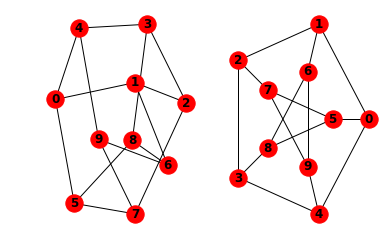

In [82]:
G = nx.petersen_graph()

plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], 
              with_labels=True, font_weight='bold')

when drawing to an interactive display. **Note** that you may need to issue a Matplotlib `plt.show()` command if you're not suing matplotlib interactively. [Matplotlib FAQ](http://matplotlib.org/faq/installing_faq.html#matplotlib-compiled-fine-but-nothing-shows-up-when-i-use-it).

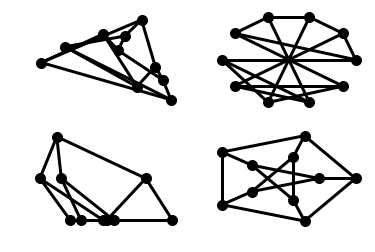

In [84]:
options = {'node_color': 'black',
           'node_size' : 100,
           'width'     : 3,
          }
plt.subplot(221)
nx.draw_random(G, **options)

plt.subplot(222)
nx.draw_circular(G, **options)

plt.subplot(223)
nx.draw_spectral(G, **options)

plt.subplot(224)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], **options)

You can find additional options via `draw_networkx()` and layouts via `layout`. You can use multiple shells with `draw_shell()`:

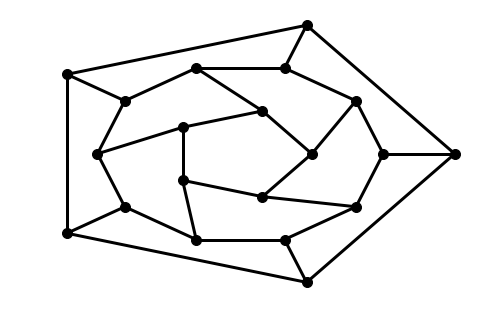

In [89]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], 
          [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], 
          [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file:

In [91]:
# nx.draw(G)
# plt.savefig("path.png")

You can also use `nx_agraph.graphviz_layout(G)` or `nx_pydot.graphviz_layout(G)` to get node positions or write the graph in dot format for further procesing if Graphviz and PyGraphviz or pydot are available.

In [ ]:
# from networkx.drawing.nx_pydot import write_dot
# pos = nx.nx_agraph.graphviz_layout(G)
# nx.draw(G, pos=pos)
# write_dot(G, 'file.dot')

Additional details in [Drawing](https://networkx.github.io/documentation/stable/reference/drawing.html)